# Comparison with existing python libraries
## using package pca

#### Data import used from dataimport.py

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os  # operating system
from sklearn.decomposition import pca

In [17]:
# Task 1: Load data sets
data_directory = "data"
dataframe = pd.read_csv(os.path.join(data_directory, "data.csv"))
print(dataframe.head(10))
print(dataframe.describe())
print(dataframe.shape)
dataframe1 = dataframe.copy()

data_directory_labels = "data_labels"
dataframe_labels = pd.read_csv(os.path.join(data_directory, "labels.csv"))
print(dataframe_labels.head(20))
print(dataframe_labels.describe())
print(dataframe_labels.shape)

  Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   
5   sample_5     0.0  3.467853  3.581918  6.620243   9.706829     0.0   
6   sample_6     0.0  1.224966  1.691177  6.572007   9.640511     0.0   
7   sample_7     0.0  2.854853  1.750478  7.226720   9.758691     0.0   
8   sample_8     0.0  3.992125  2.772730  6.546692  10.488252     0.0   
9   sample_9     0.0  3.642494  4.423558  6.849511   9.464466     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372  

In [18]:
# Task 2: Merge the data sets

dataframe = dataframe_labels.merge(dataframe, how='inner', on='Unnamed: 0')
print(dataframe.head(10))
print(dataframe.describe())
print(dataframe.shape)

print(dataframe.isnull().sum())

  Unnamed: 0 Class  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0  PRAD     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1  LUAD     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2  PRAD     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3  PRAD     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4  BRCA     0.0  2.655741  2.821547  6.539454   9.738265     0.0   
5   sample_5  PRAD     0.0  3.467853  3.581918  6.620243   9.706829     0.0   
6   sample_6  KIRC     0.0  1.224966  1.691177  6.572007   9.640511     0.0   
7   sample_7  PRAD     0.0  2.854853  1.750478  7.226720   9.758691     0.0   
8   sample_8  BRCA     0.0  3.992125  2.772730  6.546692  10.488252     0.0   
9   sample_9  PRAD     0.0  3.642494  4.423558  6.849511   9.464466     0.0   

     gene_6    gene_7  ...  gene_20521  gene_20522  gene_20523  gene_20524  \
0  7.175175  0.591871  ...    4.926711    8.210257  

In [19]:
# Drop column 'Unnamed'
if 'Unnamed: 0' in dataframe.columns:
    df = dataframe.drop(['Unnamed: 0'], axis=1)

In [20]:
# Drop column 'Unnamed'
if 'Unnamed: 0' in dataframe1.columns:
    df1 = dataframe1.drop(['Unnamed: 0'], axis=1)

In [21]:
# Move column 'Class' at the first position
cols = df.columns.tolist()
if cols[-1] == 'Class':
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
df.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [22]:
# Move column 'Class' at the first position
cols1 = df1.columns.tolist()
if cols1[-1] == 'Class':
    cols1 = cols1[-1:] + cols1[:-1]
    df1 = df1[cols1]
df1.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


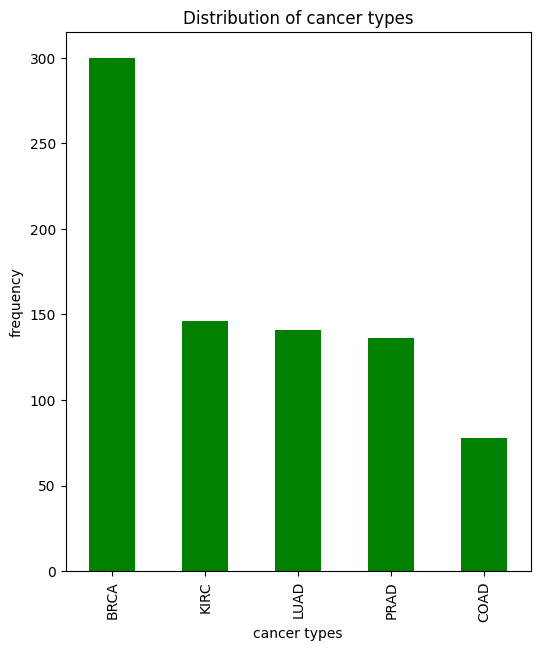

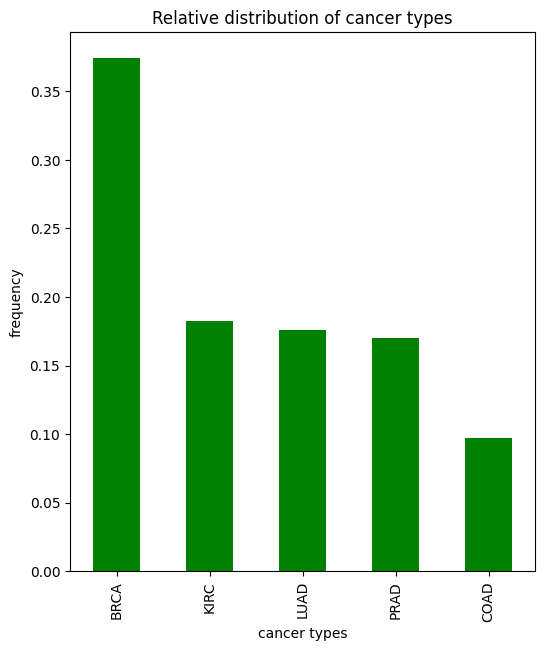

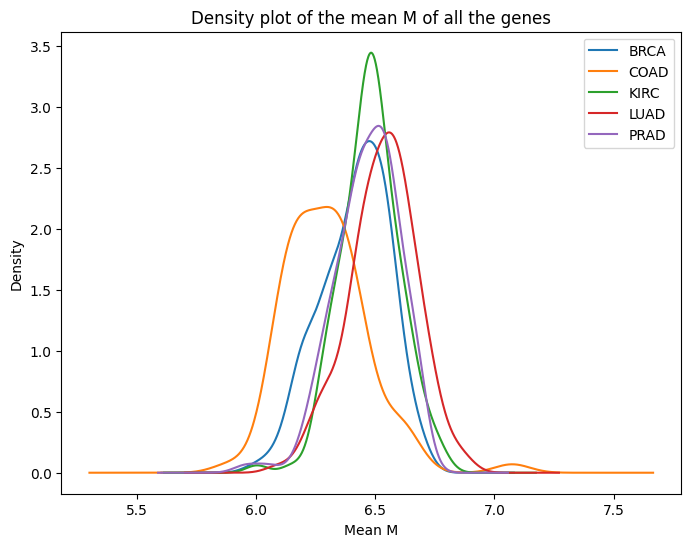

In [23]:
# Task 3: Descriptive statistics of the data

# Bar plot of the five different types of cancer

dataframe['Class'].value_counts().plot(kind='bar', xlabel='cancer types',
                                       ylabel='frequency', title='Distribution of cancer types',
                                       color='green', figsize=(6, 7))
plt.plot()
plt.savefig('Distribution of cancer types.png')
plt.show()

# Relative distribution of the five different cancer types
(dataframe['Class'].value_counts()/len(dataframe)).plot(kind='bar', xlabel='cancer types',
                                                        ylabel='frequency',
                                                        title='Relative distribution of cancer types',
                                                        color='green', figsize=(6, 7))

plt.plot()
plt.savefig('Relative distribution of cancer types.png')
plt.show()

# kernel density estimation (KDE) to estimate the probability density function of a
# random variable
# dataframe.groupby('Class')['gene_1'].plot.kde()
# plt.plot()
# plt.show()

# plotting the density of the mean values of all genes
fig, ax = plt.subplots(figsize=(8, 6))
df = pd.DataFrame({'Class': dataframe['Class'],
                   'Density': dataframe.iloc[:, 2:].sum(axis=1)/len(dataframe.columns[2:])})
labels = []
for label, df_grouped in df.groupby('Class'):
    labels.append(label)
    df_grouped.plot(kind="kde", ax=ax)

plt.legend(labels)
plt.title('Density plot of the mean M of all the genes')
plt.xlabel('Mean M')
plt.plot()
plt.savefig('Density plot of the mean M of all the genes.png')
plt.show()

### PCA implementation

using data in df

#### package pca

In [24]:
from pca import pca

In [25]:
df

,Class,Density
0,PRAD,6.514196
1,LUAD,6.276564
2,PRAD,5.955630
3,PRAD,6.295755
4,BRCA,6.423980
...,...,...
796,BRCA,6.284252
797,LUAD,6.459381
798,COAD,7.074519
799,PRAD,6.562049


In [26]:
df.describe()

,Density
count,801.000000
mean,6.443322
std,0.155151
min,5.892082
25%,6.341232
50%,6.459417
75%,6.549748
max,7.074519


In [27]:
# Initialize pca with default parameters
model = pca(normalize=True)

In [97]:
# Load dataset df
X = df1
y = dataframe_labels
col_labels = df.Class


look at ellbow plot of explained variance

In [29]:
# Fit transform
results = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [20531] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [530] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [20531] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[530]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 530 Principal Components explain [95.03%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

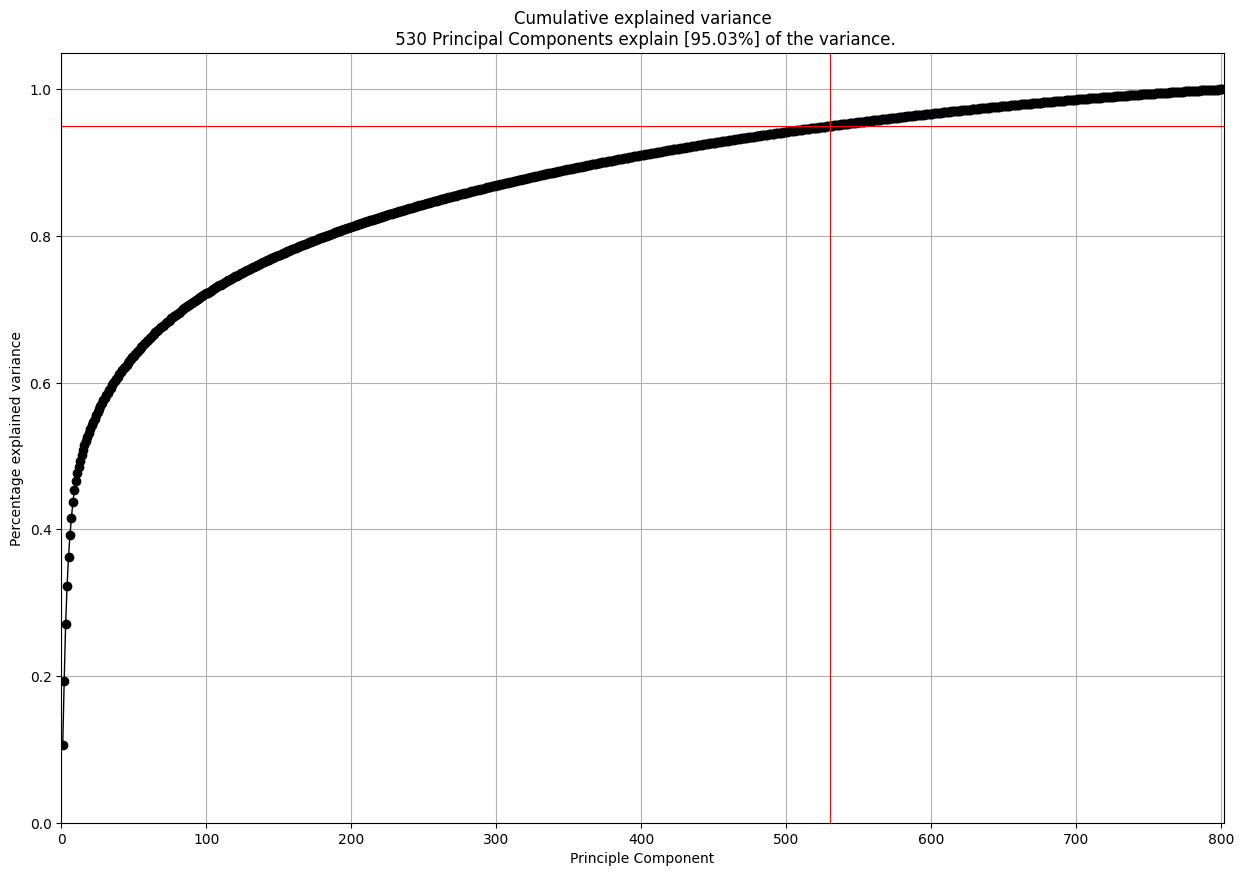

In [30]:
# Plot the explained variance
model.plot()

plot first two PCs

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '530 Principal Components explain [95.03%] of the variance'}, xlabel='PC1 (10.5% expl.var)', ylabel='PC2 (8.75% expl.var)'>)

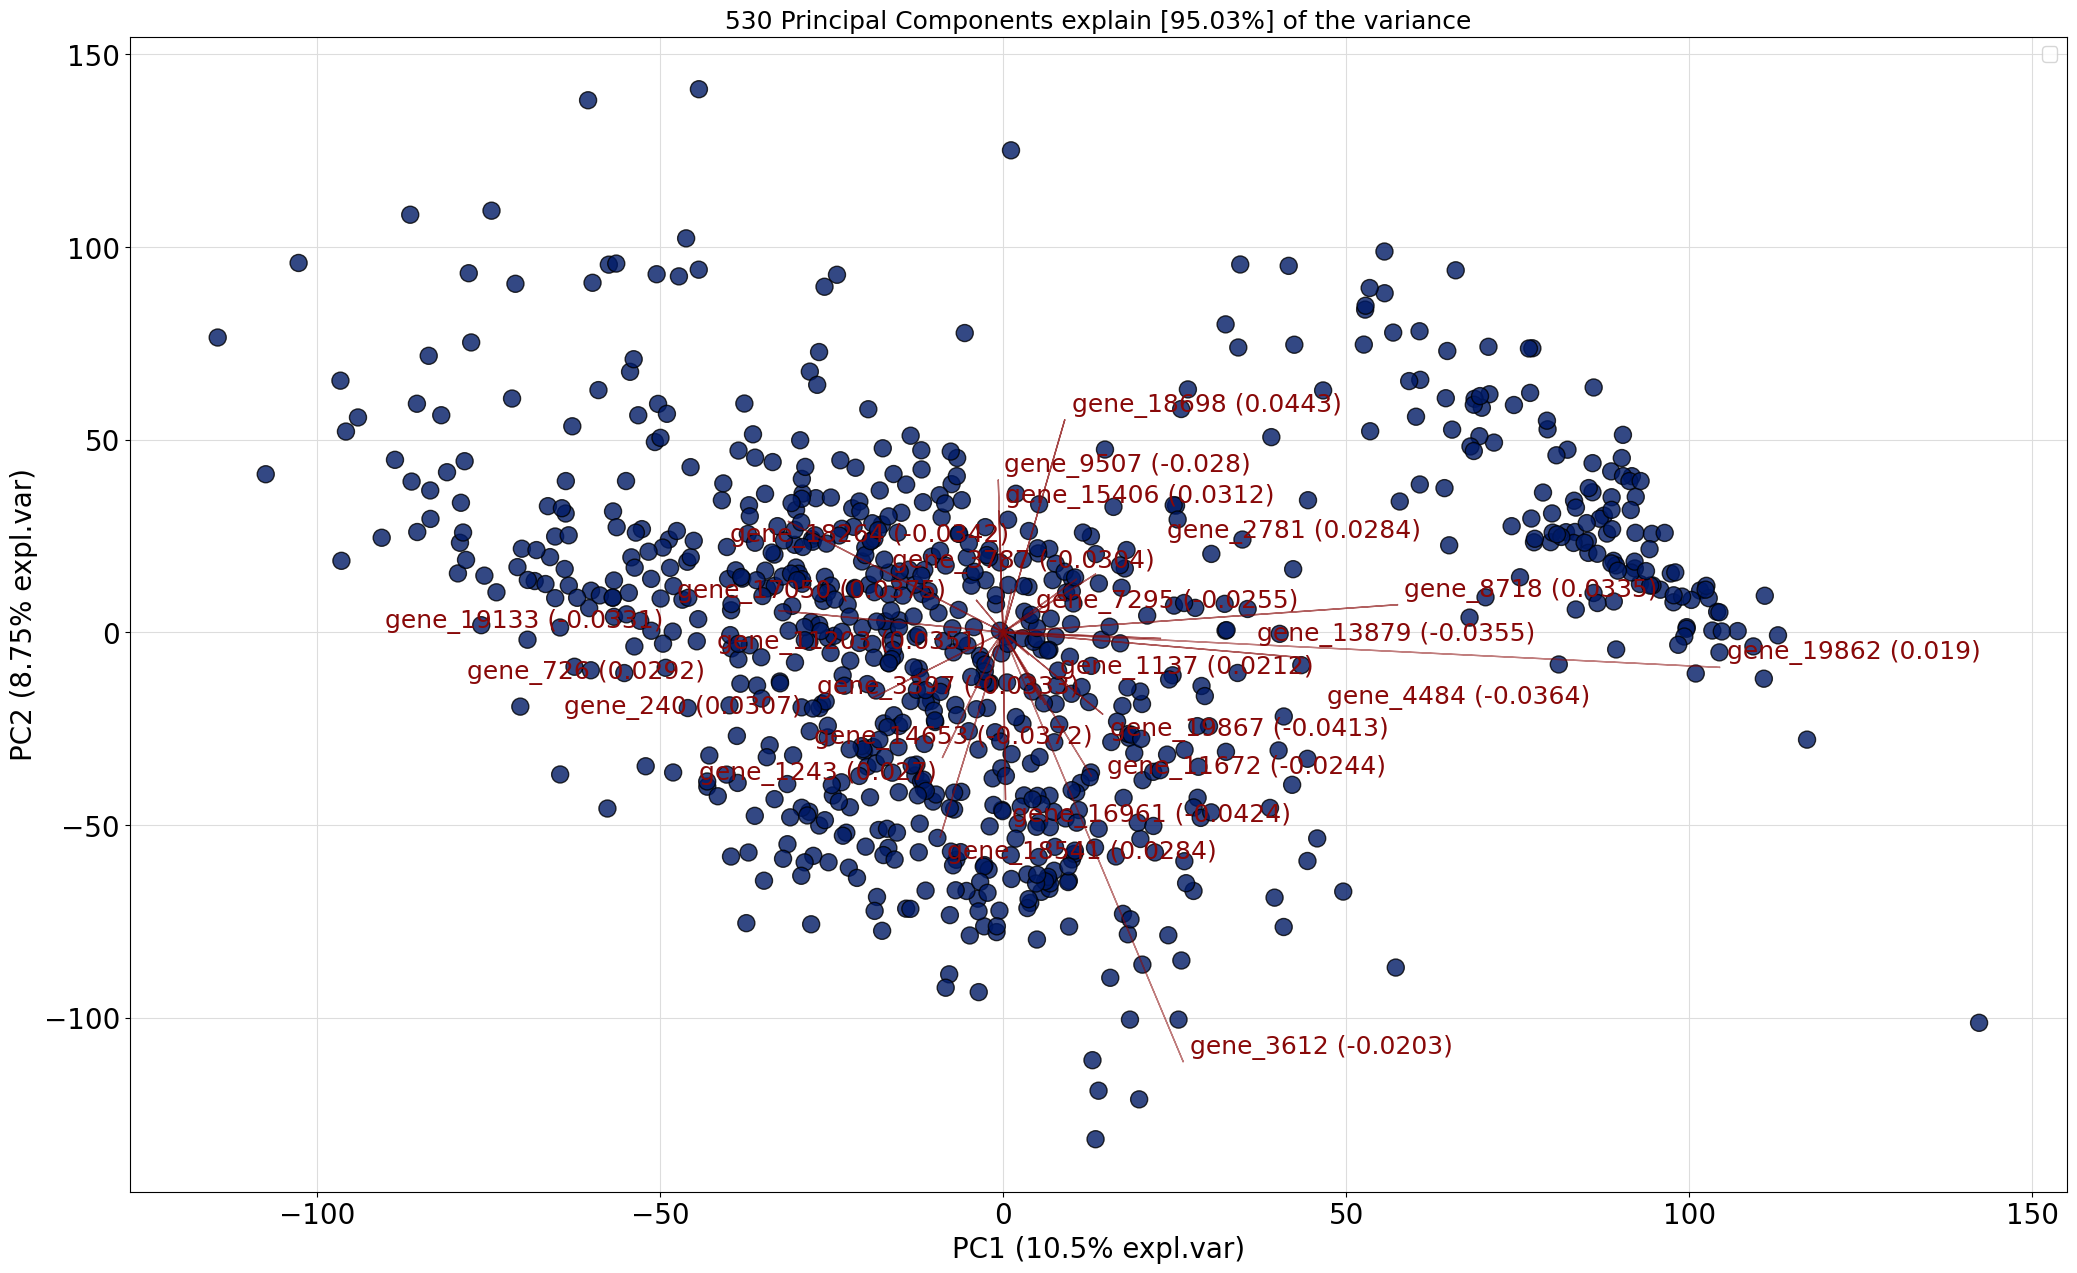

In [31]:
# Scatter plot with loadings
model.biplot()

### PCA implementation with sklearn

In [32]:
from sklearn.decomposition import PCA

In [33]:
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [34]:
dataframe.head()

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


calculate the number of missing values (NaN values) in each column of a DataFrame

In [35]:
dataframe.isnull().sum()

Unnamed: 0    0
Class         0
gene_0        0
gene_1        0
gene_2        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20533, dtype: int64

In [36]:
data_without_cat = dataframe.drop(['Unnamed: 0'], axis=1)
data_without_cat

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


change categorial "Class" data to numbers + delete sample numbers

In [37]:
df_cat_as_num = dataframe
# df_cat_as_num['Class'] = df_cat_as_num['Class'].map({'PRAD': 1, 'LUAD': 2, 'BRCA': 3, 'KIRC': 4, 'COAD': 5}) 
df_cat_as_num = df_cat_as_num.drop(['Unnamed: 0'],axis=1)

just data for pca

In [38]:
df1.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [39]:
df1.values.shape

(801, 20531)

In [40]:
pca_data = df1.values
pca_data

array([[ 0.        ,  2.01720929,  3.26552691, ...,  8.92132623,
         5.28675919,  0.        ],
       [ 0.        ,  0.59273209,  1.58842082, ...,  9.39785429,
         2.09416849,  0.        ],
       [ 0.        ,  3.51175898,  4.32719872, ..., 10.09046974,
         1.68302267,  0.        ],
       ...,
       [ 0.        ,  3.24958187,  3.70749166, ...,  9.46671072,
         4.6774575 ,  0.5866927 ],
       [ 0.        ,  2.59033853,  2.78797567, ..., 10.40058062,
         5.71875068,  0.        ],
       [ 0.        ,  2.32524248,  3.80593214, ...,  9.84479363,
         4.55071601,  0.        ]])

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Scaling data with scaler method

In [42]:
scaler = StandardScaler()
data_Scaled = scaler.fit_transform(pca_data)
data_Scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

PCA with n_components=2

In [43]:
# define number of components as 2 
pca_2_components=PCA(n_components=2)

In [44]:
#Perform fit transform on the scaled data
data_pca_2_components = pca_2_components.fit_transform(data_Scaled)
data_pca_2_components.shape

(801, 2)

In [45]:
data_pca_2_components

array([[-57.44698701,  95.41098066],
       [-16.91943003,   0.7324705 ],
       [-70.34521769, -19.30332645],
       ...,
       [ -4.13308982,  15.69001385],
       [-30.81475745,  33.52642258],
       [-22.34455664,   4.05235626]])

In [46]:
# Put the data back on the 2 columns defined 
pca_data_2comp = pd.DataFrame(data_pca_2_components)
pca_data_2comp.columns = ['pca1','pca2']

# Add the convereted categorical data for 
pca_data_2comp['cancer_type']=df_cat_as_num['Class']
pca_data_2comp

,pca1,pca2,cancer_type
0,-57.446987,95.410981,PRAD
1,-16.919430,0.732470,LUAD
2,-70.345218,-19.303326,PRAD
3,-49.161591,-9.227586,PRAD
4,-18.132534,-51.327797,BRCA
...,...,...,...
796,-12.417385,-42.321573,BRCA
797,-29.415554,28.526281,LUAD
798,-4.133090,15.690014,COAD
799,-30.814757,33.526423,PRAD


In [47]:
import seaborn as sns

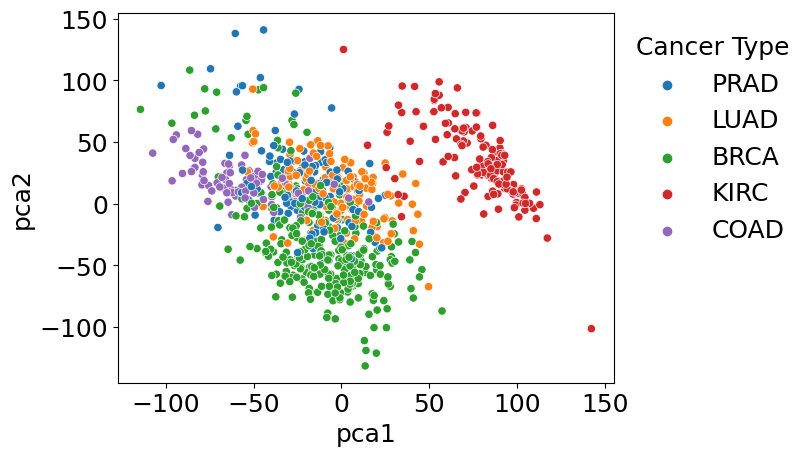

In [48]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca1',y='pca2', hue = 'cancer_type',data=pca_data_2comp)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

In [49]:
# Compute the explained variance ratio
explained_variance_ratio = pca_2_components.explained_variance_ratio_
explained_variance_ratio
# Sum the elements of the array
var_sum = np.sum(explained_variance_ratio)
var_sum

0.19294013819924272

In [50]:
explained_variance_ratio

array([0.10539781, 0.08754232])

In [51]:
print(pca_2_components.singular_values_)

[1307.96055583 1192.03191725]


pca 2 components on unscaled data

In [52]:
#Perform fit transform on the scaled data
data_pca_2_comp_unscaled = pca_2_components.fit_transform(pca_data)
data_pca_2_comp_unscaled.shape

(801, 2)

In [53]:
data_pca_2_comp_unscaled

array([[-62.75541522, -94.07197346],
       [ -2.43289636,  90.58584185],
       [-71.26685285,  -8.06460778],
       ...,
       [ 10.48626145,  21.57059459],
       [-55.06360486, -92.39477804],
       [-49.10303379, -50.9976391 ]])

In [54]:
# Put the data back on the 2 columns defined 
pca_data_2comp_unscaled = pd.DataFrame(data_pca_2_comp_unscaled)
pca_data_2comp_unscaled .columns = ['pca1','pca2']

# Add the convereted categorical data for 
pca_data_2comp_unscaled ['cancer_type']=df_cat_as_num['Class']
pca_data_2comp_unscaled

,pca1,pca2,cancer_type
0,-62.755415,-94.071973,PRAD
1,-2.432896,90.585842,LUAD
2,-71.266853,-8.064608,PRAD
3,-84.770785,-73.244566,PRAD
4,-69.560171,-9.612940,BRCA
...,...,...,...
796,-60.861882,-22.278633,BRCA
797,-14.465433,53.392194,LUAD
798,10.486261,21.570595,COAD
799,-55.063605,-92.394778,PRAD


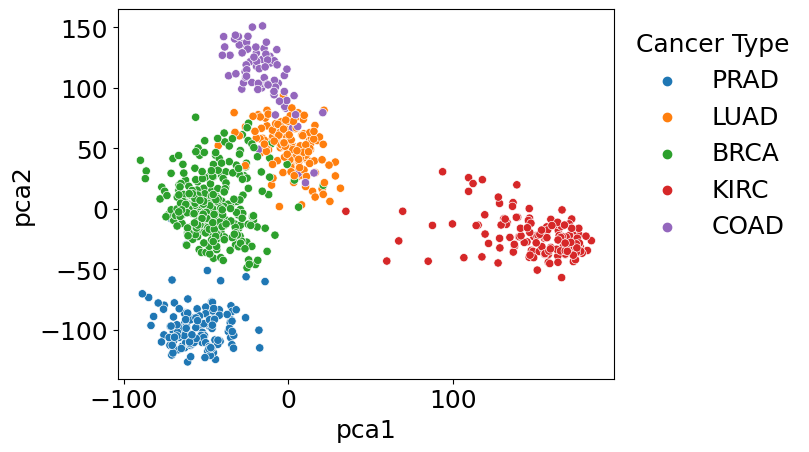

In [55]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca1',y='pca2', hue = 'cancer_type',data=pca_data_2comp_unscaled)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

In [56]:
# Compute the explained variance ratio
explained_variance_ratio = pca_2_components.explained_variance_ratio_
explained_variance_ratio
# Sum the elements of the array
var_sum = np.sum(explained_variance_ratio)
var_sum

0.26342510244434825

In [57]:
explained_variance_ratio

array([0.1583855, 0.1050396])

In [58]:
print(pca_2_components.singular_values_)

[2142.26910596 1744.58784556]


PCA with n_components=.995

In [59]:
pca_995_varexpl=PCA(.995)
data_pca_995_varexpl = pca_995_varexpl.fit_transform(pca_data)
data_pca_995_varexpl.shape
data_pca_995_varexpl

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         3.09258084e+00,  7.13597730e-01, -8.21221710e-02],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
         1.39674724e-02, -3.95175744e-01, -9.49947250e-01],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         1.28898532e-01, -2.64530262e-01,  3.84594189e-01],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
        -6.47882986e-01, -2.07256774e-01,  1.38942922e-01],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
         1.74673062e+00,  2.02232239e+00, -1.92708948e+00],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         1.80367340e+00,  2.22994027e+00, -8.07255452e-01]])

In [60]:
df_pca_995 = pd.DataFrame(data_pca_995_varexpl)
df_pca_995['cancer_type']=df_cat_as_num['Class']
df_pca_995

,0,1,2,3,4,5,6,7,8,9,...,738,739,740,741,742,743,744,745,746,cancer_type
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-4.081064,-0.626193,-1.265756,-0.017984,-2.740860,0.944037,3.092581,0.713598,-0.082122,PRAD
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,0.215619,-0.593678,-0.403462,1.181537,0.490910,0.197768,0.013967,-0.395176,-0.949947,LUAD
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.263786,0.328453,0.004078,0.363928,-1.109210,0.331488,0.128899,-0.264530,0.384594,PRAD
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,0.381578,0.652455,-3.624900,-1.203028,-2.347912,1.577992,-0.781748,0.120442,-0.057973,PRAD
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,1.488047,2.767486,-0.631562,-0.794275,-0.514008,-1.875969,-2.526109,-1.073803,-1.161728,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-0.780676,0.105227,-2.001001,1.579115,0.955344,0.085881,2.667448,0.632850,0.023523,BRCA
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,-0.712822,0.624739,-0.162403,-0.238540,0.584705,1.404867,0.564251,-0.054682,-0.905574,LUAD
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,0.269628,-0.348648,-0.531710,0.055553,0.220559,0.331122,-0.647883,-0.207257,0.138943,COAD
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,0.045885,-2.222754,-4.115667,-0.064646,-0.447662,-0.243658,1.746731,2.022322,-1.927089,PRAD


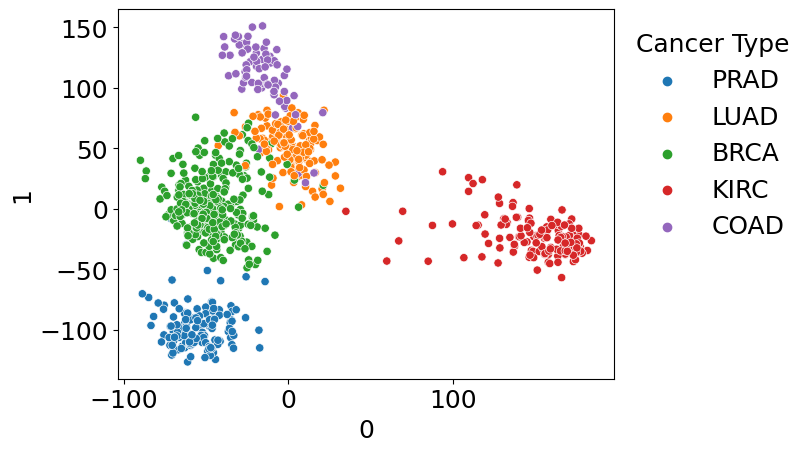

In [61]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=df_pca_995)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

In [62]:
# Compute the explained variance ratio
explained_variance_ratio2 = pca_995_varexpl.explained_variance_ratio_
explained_variance_ratio2
# Sum the elements of the array
var_sum = np.sum(explained_variance_ratio2)
var_sum

0.99508534402634

pca with 0.8 variance explained

In [63]:
pca_80_varexpl=PCA(.8)
data_pca_80_varexpl = pca_80_varexpl.fit_transform(pca_data)
data_pca_80_varexpl.shape
data_pca_80_varexpl

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         7.94060388e+00, -7.06680386e+00, -2.81226053e+00],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
         1.26990540e+01,  4.14578902e+00, -2.97892770e+00],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         5.60617355e+00,  6.99430777e+00,  1.09666054e+00],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
         3.94600387e-01, -8.98429207e+00,  1.53112076e+01],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
        -3.33436633e+00,  6.07479033e+00, -5.17118054e-02],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         1.03919355e+01, -1.49445353e+01, -6.67653034e+00]])

In [64]:
df_pca_8 = pd.DataFrame(data_pca_80_varexpl)
df_pca_8['cancer_type']=df_cat_as_num['Class']
df_pca_8

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,cancer_type
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-4.881518,-8.955817,4.244323,0.212814,3.717421,7.387874,7.940604,-7.066804,-2.812261,PRAD
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,3.390682,-3.875743,-2.757225,-0.867225,1.197545,-1.368719,12.699054,4.145789,-2.978928,LUAD
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.290939,0.775069,2.062123,-11.285172,-14.747882,18.737396,5.606174,6.994308,1.096661,PRAD
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,0.384581,-2.606969,-15.641990,-0.659666,-0.239884,5.110380,3.007725,-13.734313,4.230453,PRAD
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,0.595232,-0.791296,-10.341703,5.066024,1.800128,5.257290,-6.474134,4.997844,-6.566568,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-2.086041,3.305257,-3.212236,-1.558169,-0.883681,0.349288,-0.341015,-3.538561,10.626982,BRCA
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,-13.220285,0.618533,-2.815731,4.097867,8.309880,-1.452253,2.163485,2.880203,2.676312,LUAD
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,1.057910,0.120773,-6.075542,-7.890112,-3.144567,4.926071,0.394600,-8.984292,15.311208,COAD
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,13.856473,2.029606,4.053701,14.649003,-3.458088,3.418559,-3.334366,6.074790,-0.051712,PRAD


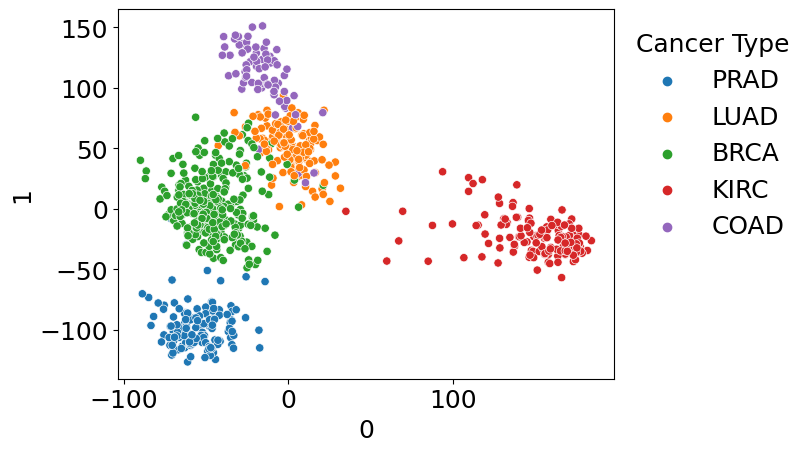

In [65]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=df_pca_8)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

## Classification using Logistic Regression

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
# from sklearn.datasets import load_iris

In [118]:
# load data
dc = pca_data_2comp_unscaled

# initiate pca and classifier
pca = PCA()
classifier = DecisionTreeClassifier()

In [120]:
# Split the transformed data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# apply pca
transformed_data = pca.fit_transform(X_train)

In [ ]:
# Fit the data
classifier.fit(X_train, y_train)

In [110]:
# predict new data
newdata = X_test
# transform newdata using fitted pca
newdata_transformed = pca.transform(newdata)
# predict labels with trained classifier
pred_labels = classifier.predict(newdata_transformed)

In [ ]:
#TODO Needs to be fixed!

# Plotting the classified data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Classified Data')
plt.show()